<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Berlim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Berlim*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim, e ver quais insights podem ser extraídos a partir de dados brutos.**

Esse projeto é um projeto inicial de Ciência de Dados e visa realizar uma análise das informação diponibilizadas pelo próprio Airbnb.

Tal publicação se faz importante pois mostra como podemos fazer análises completas e bem elaborados de dados que estão disponíveis publicamente e que podem auxiliar no processo decisório de uma empresa.

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("listings.csv")

## Análise dos Dados


Abaixo temos um dicionário de variáveis que visa esclarecer o significado de uma das variáveis existentes no conjunto de dados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,77,90,143,2021-07-22,2.15,5,326,10,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.12,1,93,1,NaN
2,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2019-12-11,2.40,1,0,0,NaN
3,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.16,1,0,0,03/Z/RA/003410-18
4,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,90,26,2013-02-01,0.26,3,102,1,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [7]:
# identificar o volume de dados do DataFrame
print("Nosso dataset possui as seguintes dimensões:")
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Nosso dataset possui as seguintes dimensões:
Entradas:	 18288
Variáveis:	 18



In [8]:
# verificando os tipos de dados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma prática muito importante é verificar a quantidade de dados ausentes antes de iniciarmos nossas análises.

Com essa informação saberemos o que fazer com cada tipo de dado ausente. Em alguns casos é mais interessante excluir e em outros é melhor recompletar da forma mais apropriada.

Mas além da capacidade técnica para recompletar os dados faltantes é saber o motivo pelo qual eles não estão lá e de que forma isso irá impactar em nossa análise.

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

license                           87.592957
reviews_per_month                 19.531934
last_review                       19.531934
name                               0.158574
host_name                          0.087489
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64

Podemos ver que na coluna `license` temos quase 90% dos dados ausentes. Como essa informação não possui relevância para nenhuma análise estátistica descritiva e nem preditiva, vamos excluir toda essa coluna:

In [10]:
df.drop("license", axis=1, inplace=True)

Apesar de não ter sido uma análise bem elaborada sobre as outras informações ausentes, vamos preencher os dados faltantes referente a quantidade de reviews por mês com a mediana da informação:

In [11]:
median_reviews_per_month = df.reviews_per_month.median()

df.reviews_per_month.fillna(median_reviews_per_month, inplace=True)

E agora verificamos novamente as variáveis ausentes:

In [12]:
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

last_review                       19.531934
name                               0.158574
host_name                          0.087489
number_of_reviews_ltm              0.000000
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
availability_365                   0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Aqui iremos analisar a distribuição dos dados quantitativos.

Para isso iremos excluir algumas variáveis que apesar de numéricas não fazem sentido terem sua distribuição analisadas, como por exemplo o id e o host_id.

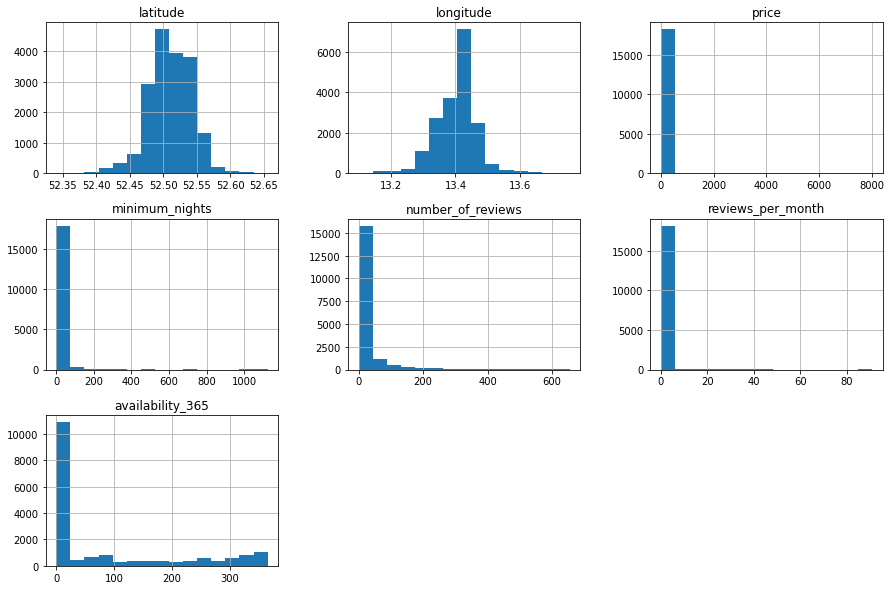

In [16]:
# plotar o histograma das variáveis numéricas
df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365']].hist(bins=15, figsize=(15,10));

Analisando os histogramas acima vemos que apenas a latitude e longitude possui distribuições normais.

Vamos dar uma limpada nos dados para excluir alguns outliers.

Primeiramente criaremos uma função que nos retorna os valores de máximo e mínimo conforme a figura abaixo:
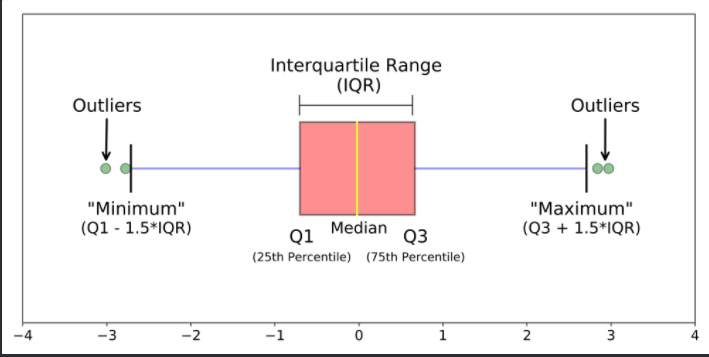 

In [21]:
def limites_outliers(coluna):
  iqr = coluna.quantile(0.75) - coluna.quantile(0.25)
  lim_sup = coluna.quantile(0.75) + (1.5 * iqr)
  lim_inf = coluna.quantile(0.25) - (1.5 * iqr)
  return lim_inf, lim_sup

Agora vamos obter os valores de máximo e mínimo de cada variável:

In [27]:
lim_inf_price, lim_sup_price = limites_outliers(df.price)
lim_inf_minimum_nights, lim_sup_minimum_nights = limites_outliers(df.minimum_nights)
lim_inf_number_of_reviews, lim_sup_number_of_reviews = limites_outliers(df.number_of_reviews)
lim_inf_reviews_per_month, lim_sup_reviews_per_month = limites_outliers(df.reviews_per_month)
lim_inf_availability_365, lim_sup_availability_365 = limites_outliers(df.availability_365)

Por fim, vamos criar uma nova função que realiza a limpeza dos outliers e em seguida já faremos a limpeza dos valores:

In [65]:
def exclui_outliers(df, coluna, min, max):
  df.drop(coluna[coluna > max].index, inplace=True)
  df.drop(coluna[coluna < min].index, inplace=True)

In [69]:
exclui_outliers(df, df.price, lim_inf_price, lim_sup_price)
exclui_outliers(df, df.minimum_nights, lim_inf_minimum_nights, lim_sup_minimum_nights)
exclui_outliers(df, df.number_of_reviews, lim_inf_number_of_reviews, lim_sup_number_of_reviews)
exclui_outliers(df, df.reviews_per_month, lim_inf_reviews_per_month, lim_sup_reviews_per_month)
exclui_outliers(df, df.availability_365, lim_inf_availability_365, lim_sup_availability_365)

Por fim, vamos verificar novamento os histogramas, mas agora sem a presença de outliers

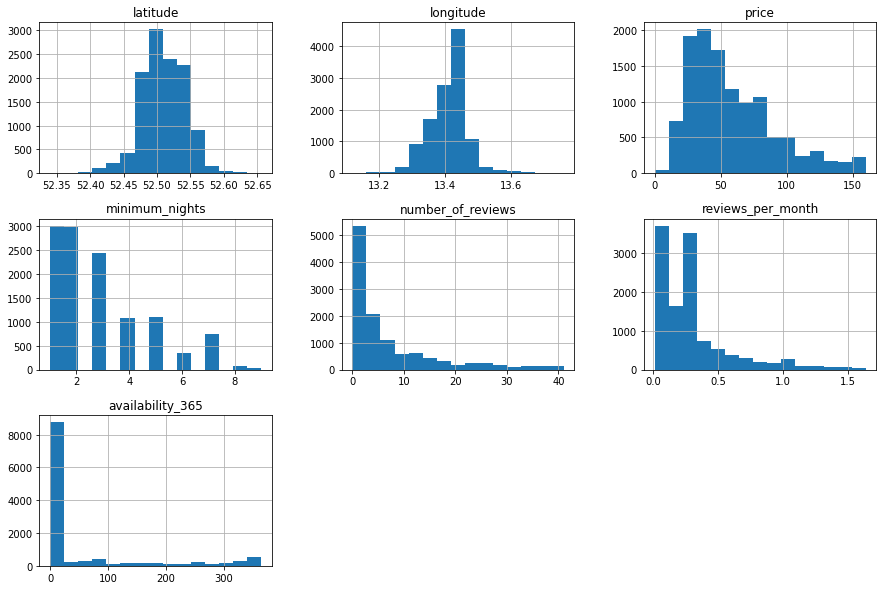

In [70]:
# plotar o histograma das variáveis numéricas
df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365']].hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Vamos analisar qual a medidas de tendência central dos preços de aluguel na cidade de Berlim:

* Média
* Mediana
* Moda

In [80]:
print("A média dos apartamentos é de %.2f Euros" %(df.price.mean()))
print("A mediana dos apartamentos é de %.2f Euros" %(df.price.median()))
print("A moda dos apartamentos é de %.2f Euros" %(df.price.mode()[0]))

A média dos apartamentos é de 58.21 Euros
A mediana dos apartamentos é de 50.00 Euros
A moda dos apartamentos é de 50.00 Euros


### **Q4. Qual a correlação existente entre as variáveis**

A correlação entre as variáveis é muito importante para poder ver quais variáveis se relacionam e de qual forma o fazem.

Isso nos ajuda a entender melhor o problema e assim, gerar melhor soluções para os processos decisórios.

Além de que pode evitar algumas duplicidade e nos ajudar a encontrar melhoresre lações quando trabalhamos com modelos de machine learning.

De um forma numérica, vamos olhar esse valores:

In [84]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365']].corr()

corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
latitude,1.000000,-0.162016,0.023990,-0.014656,0.013603,0.006699,-0.018920
longitude,-0.162016,1.000000,-0.010217,0.006473,-0.012084,-0.022155,-0.015001
price,0.023990,-0.010217,1.000000,0.046090,0.073411,0.164253,0.286557
minimum_nights,-0.014656,0.006473,0.046090,1.000000,-0.017782,-0.071086,-0.087675
number_of_reviews,0.013603,-0.012084,0.073411,-0.017782,1.000000,0.531376,0.111101
reviews_per_month,0.006699,-0.022155,0.164253,-0.071086,0.531376,1.000000,0.272960
availability_365,-0.018920,-0.015001,0.286557,-0.087675,0.111101,0.272960,1.000000


Agora, vamos analisar a mesma informação com um visual mais agradável e colorido:

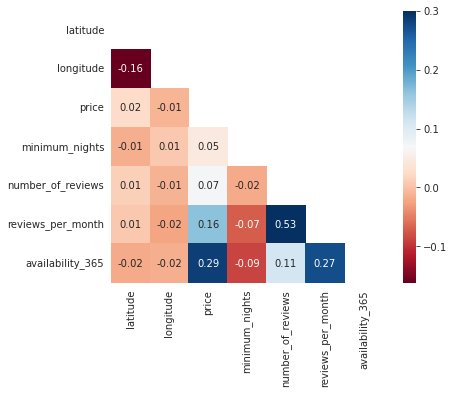

In [87]:
# plotar um heatmap a partir das correlações
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(7, 5))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Como um visual mais agradável, podemos facilmente identificar, graças as cores, que a maior correlação existente era algo já esperado que é o número de reviews por mes e o número total de reviews.

Como falado anteriormente, caso isso fosse ser utilizado em algoritimo de machine learning, estaria valorizando muito a informação que refere aos reviews pois ela seria passado 2x para o modelo.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [92]:
# mostrar a quantidade de cada tipo de imóvel disponível
pd.DataFrame(df.room_type.value_counts())

,room_type
Entire home/apt,5824
Private room,5715
Shared room,130
Hotel room,73


In [94]:
# mostrar a porcentagem de cada tipo de imóvel disponível
pd.DataFrame((df.room_type.value_counts()/df.shape[0] * 100))

,room_type
Entire home/apt,49.599727
Private room,48.671436
Shared room,1.107137
Hotel room,0.621700


E agora para facilitar o entendimento, vamos analisar a mesma situação com um gráfico:

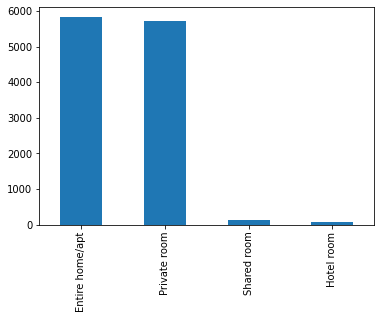

In [95]:
df.room_type.value_counts().plot(kind="bar")

### **Q6. Qual a localidade mais cara do dataset?**



In [100]:
# ver preços por bairros, na média
pd.DataFrame(df.groupby("neighbourhood").price.mean().sort_values(ascending=False)).head(10)

,price
neighbourhood,
Köpenick-Süd,136.269231
Haselhorst,119.666667
"Malchow, Wartenberg und Falkenberg",109.500000
Wilhelmstadt,89.909091
Marzahn-Süd,88.176471
Schmöckwitz/Karolinenhof/Rauchfangswerder,83.529412
Rahnsdorf/Hessenwinkel,81.826087
Bohnsdorf,81.428571
Heerstrasse,81.400000


Usando a latitude e a longitude podemos ter uma noção geográfica de onde se localizam os imóveis mais caros no cidade de Berlim.

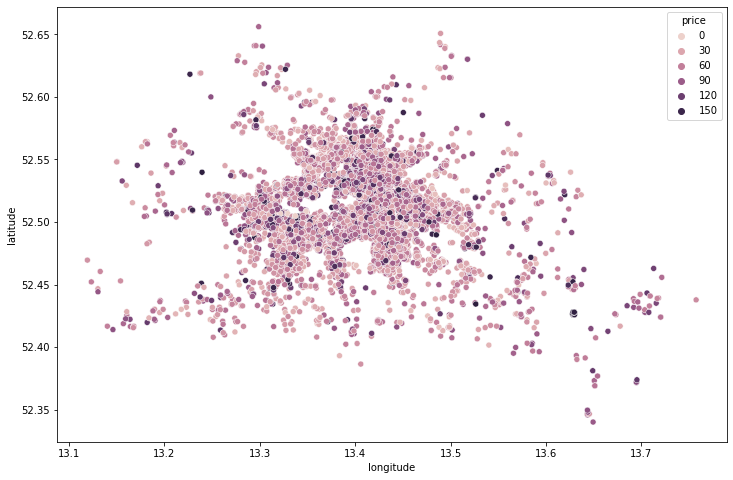

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="price");

Olhando o gráfico acima, vemos que os imóveis mais caros se localizam na região central da cidade.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Vamos analisar qual a medidas de tendência central do mínimo de noites para aluguel na cidade de Berlim:

* Média
* Mediana
* Moda

In [112]:
print("A média do mínimo de noites para aluguel é %.2f dias" %(df.minimum_nights.mean()))
print("A mediana do mínimo de noites para aluguel é %.2f dias" %(df.minimum_nights.median()))
print("A moda do mínimo de noites para aluguel é %.2f dias" %(df.minimum_nights.mode()[0]))

A média do mínimo de noites para aluguel é 2.90 dias
A mediana do mínimo de noites para aluguel é 2.00 dias
A moda do mínimo de noites para aluguel é 1.00 dias


## Conclusões


Apesar de ser uma análise bem simples, podemos levantar diversas informações muito relevantes para quem quer alugar ou anunciar um apartamento pelo AirBnb em Berlim. Todas as informações aqui apresentadas apesar de estarem disponíveis na internet, uma simples busca no Google não trará as respostas que aqui foram apresentadas. Por isso, deixo como mensagem final a importância do conheciemento de Data Science, pois além de ser a profissão do futuro, nos apresenta a ferramentas que pode nos ajudar a otimizar e resolver diversos problemas do nosso dia-a-dia!